# ENGS 27 Final Project Starter Code
[Enter Names of Group Members Here]

Please copy this code to work on your own version!

The following code interfaces with the noisy channel, hosted on a Dartmouth website.

In [10]:
import math
import subprocess

def noisy_channel(bits: str) -> str:
    """
    Calls curl to POST the given bits to the test.py endpoint
    and returns the stdout response as a string.
    """
    # Build the curl command and arguments:
    cmd = [
        "curl",
        "-X", "POST",
        "-d", f"bits={bits}",
        "https://engs27.host.dartmouth.edu/cgi-bin/noisychannel.py"
    ]

    # Run the command, capture stdout/stderr
    result = subprocess.run(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True,       # return strings instead of bytes
        check=False      # we’ll inspect returncode manually
    )

    if result.returncode != 0:
        # curl failed. You can raise, log, or return stderr.
        raise RuntimeError(f"curl failed (code {result.returncode}):\n{result.stderr}")

    return result.stdout.split("<body>")[1].split("</body>")[0]


Example Usage

In [11]:
noisy_channel("0110")

'0110'

Let's collect data from different string lengths

In [12]:
import matplotlib.pyplot as plt
from collections import Counter
import json

ModuleNotFoundError: No module named 'matplotlib'

Mutation Summary:
Original '1' -> Mutations: {'1': 978, '0': 22}
Original '0' -> Mutations: {'0': 988, '1': 12}
Original '11' -> Mutations: {'11': 959, '01': 31, '10': 10}
Original '10' -> Mutations: {'10': 939, '00': 33, '11': 28}
Original '01' -> Mutations: {'01': 947, '00': 36, '11': 17}
Original '00' -> Mutations: {'00': 981, '01': 15, '10': 4}


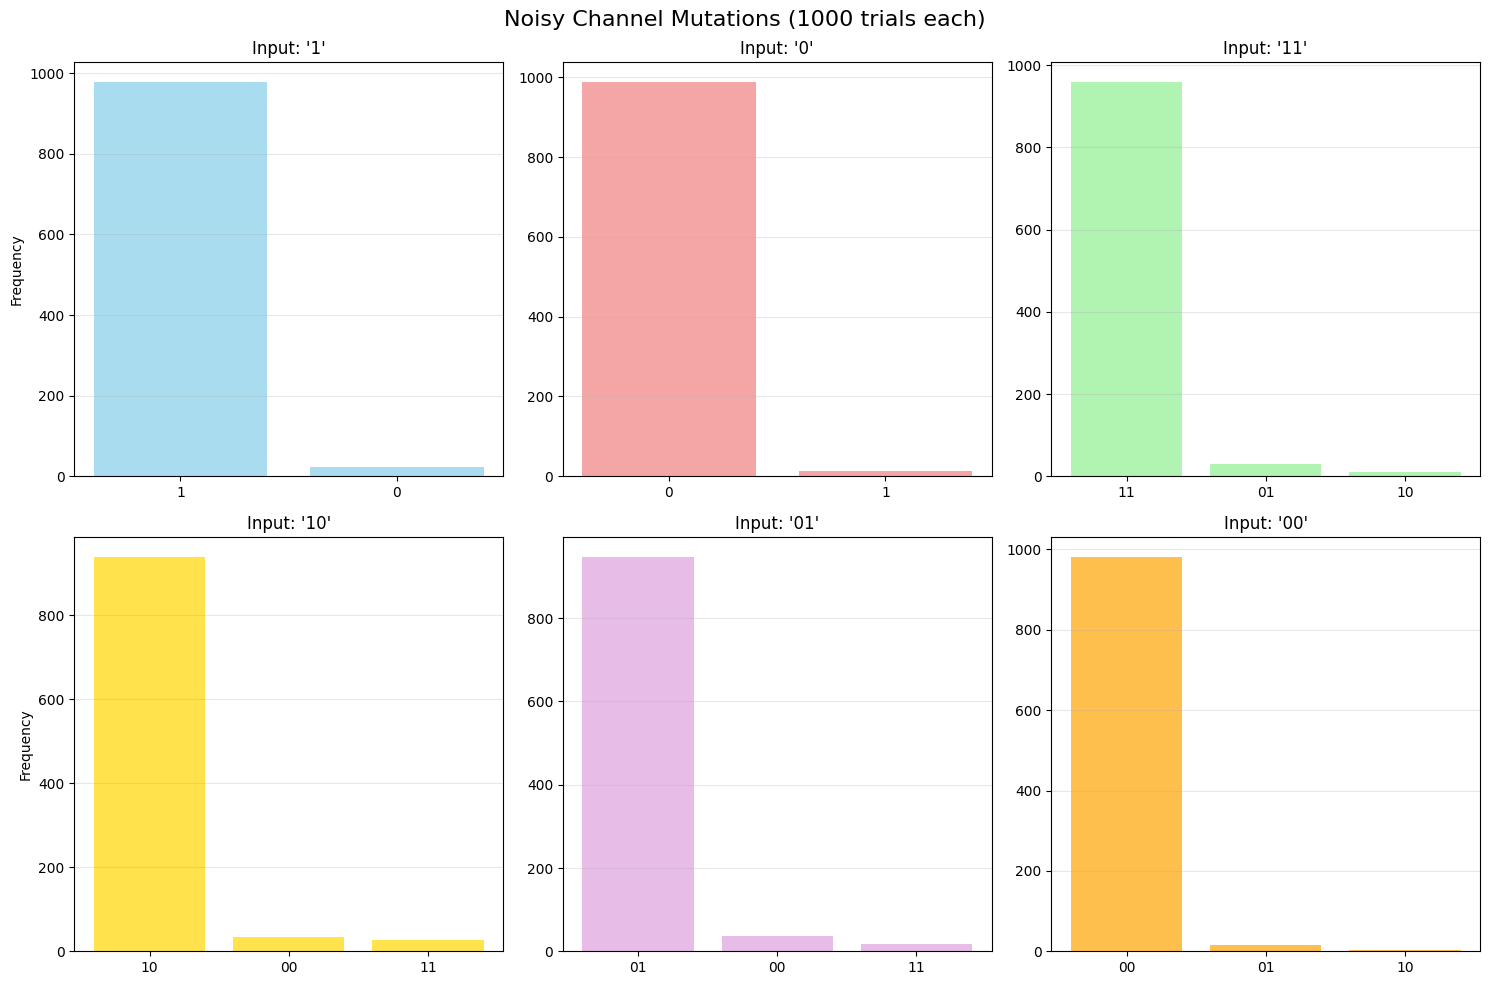

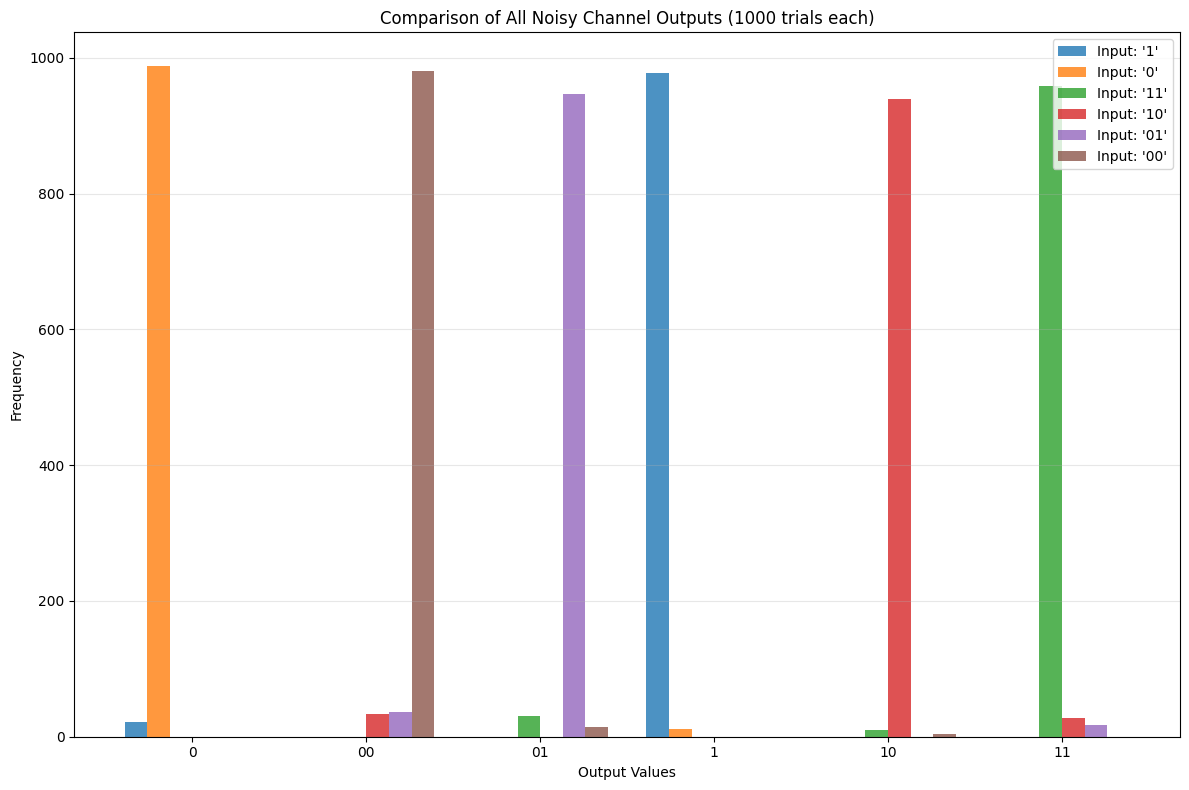


Error Rates:
'1' -> correct: 97.8%, error: 2.2%
'0' -> correct: 98.8%, error: 1.2%
'11' -> correct: 95.9%, error: 4.1%
'10' -> correct: 93.9%, error: 6.1%
'01' -> correct: 94.7%, error: 5.3%
'00' -> correct: 98.1%, error: 1.9%


In [ ]:
one = '1'
zero = '0'

oneone = '11'
onezero = '10'
zeroone = '01'
zerozero = '00'

num_trials = 1000

one_trials: list[str] = []
zero_trials: list[str] = []
oneone_trials: list[str] = []
onezero_trials: list[str] = []
zeroone_trials: list[str] = []
zerozero_trials: list[str] = []

for _ in range(num_trials):
    one_trials.append(noisy_channel(one))
    zero_trials.append(noisy_channel(zero))
    oneone_trials.append(noisy_channel(oneone))
    onezero_trials.append(noisy_channel(onezero))
    zeroone_trials.append(noisy_channel(zeroone))
    zerozero_trials.append(noisy_channel(zerozero))

results_data = {
    'one_trials': one_trials,
    'zero_trials': zero_trials,
    'oneone_trials': oneone_trials,
    'onezero_trials': onezero_trials,
    'zeroone_trials': zeroone_trials,
    'zerozero_trials': zerozero_trials
}

with open('noisy_channel_results.json', 'w') as f:
    json.dump(results_data, f, indent=2)

one_counts = Counter(one_trials)
zero_counts = Counter(zero_trials)
oneone_counts = Counter(oneone_trials)
onezero_counts = Counter(onezero_trials)
zeroone_counts = Counter(zeroone_trials)
zerozero_counts = Counter(zerozero_trials)

print("Mutation Summary:")
print(f"Original '1' -> Mutations: {dict(one_counts)}")
print(f"Original '0' -> Mutations: {dict(zero_counts)}")
print(f"Original '11' -> Mutations: {dict(oneone_counts)}")
print(f"Original '10' -> Mutations: {dict(onezero_counts)}")
print(f"Original '01' -> Mutations: {dict(zeroone_counts)}")
print(f"Original '00' -> Mutations: {dict(zerozero_counts)}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f'Noisy Channel Mutations ({num_trials} trials each)', fontsize=16)

axes[0, 0].bar(one_counts.keys(), one_counts.values(), color='skyblue', alpha=0.7)
axes[0, 0].set_title("Input: '1'")
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].bar(zero_counts.keys(), zero_counts.values(), color='lightcoral', alpha=0.7)
axes[0, 1].set_title("Input: '0'")
axes[0, 1].grid(axis='y', alpha=0.3)

axes[0, 2].bar(oneone_counts.keys(), oneone_counts.values(), color='lightgreen', alpha=0.7)
axes[0, 2].set_title("Input: '11'")
axes[0, 2].grid(axis='y', alpha=0.3)

axes[1, 0].bar(onezero_counts.keys(), onezero_counts.values(), color='gold', alpha=0.7)
axes[1, 0].set_title("Input: '10'")
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].bar(zeroone_counts.keys(), zeroone_counts.values(), color='plum', alpha=0.7)
axes[1, 1].set_title("Input: '01'")
axes[1, 1].grid(axis='y', alpha=0.3)

axes[1, 2].bar(zerozero_counts.keys(), zerozero_counts.values(), color='orange', alpha=0.7)
axes[1, 2].set_title("Input: '00'")
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

all_outputs = set()
all_outputs.update(one_counts.keys())
all_outputs.update(zero_counts.keys())
all_outputs.update(oneone_counts.keys())
all_outputs.update(onezero_counts.keys())
all_outputs.update(zeroone_counts.keys())
all_outputs.update(zerozero_counts.keys())

sorted_outputs = sorted(all_outputs)

fig, ax = plt.subplots(figsize=(12, 8))

x_pos = range(len(sorted_outputs))
width = 0.13

ax.bar([x - 2.5*width for x in x_pos], [one_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '1'", alpha=0.8)
ax.bar([x - 1.5*width for x in x_pos], [zero_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '0'", alpha=0.8)
ax.bar([x - 0.5*width for x in x_pos], [oneone_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '11'", alpha=0.8)
ax.bar([x + 0.5*width for x in x_pos], [onezero_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '10'", alpha=0.8)
ax.bar([x + 1.5*width for x in x_pos], [zeroone_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '01'", alpha=0.8)
ax.bar([x + 2.5*width for x in x_pos], [zerozero_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '00'", alpha=0.8)

ax.set_xlabel('Output Values')
ax.set_ylabel('Frequency')
ax.set_title(f'Comparison of All Noisy Channel Outputs ({num_trials} trials each)')
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_outputs)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nError Rates:")
print(f"'1' -> correct: {one_counts.get('1', 0)/num_trials:.1%}, error: {(num_trials - one_counts.get('1', 0))/num_trials:.1%}")
print(f"'0' -> correct: {zero_counts.get('0', 0)/num_trials:.1%}, error: {(num_trials - zero_counts.get('0', 0))/num_trials:.1%}")
print(f"'11' -> correct: {oneone_counts.get('11', 0)/num_trials:.1%}, error: {(num_trials - oneone_counts.get('11', 0))/num_trials:.1%}")
print(f"'10' -> correct: {onezero_counts.get('10', 0)/num_trials:.1%}, error: {(num_trials - onezero_counts.get('10', 0))/num_trials:.1%}")
print(f"'01' -> correct: {zeroone_counts.get('01', 0)/num_trials:.1%}, error: {(num_trials - zeroone_counts.get('01', 0))/num_trials:.1%}")
print(f"'00' -> correct: {zerozero_counts.get('00', 0)/num_trials:.1%}, error: {(num_trials - zerozero_counts.get('00', 0))/num_trials:.1%}")

Let's make a binary tree to define our huffman encoding from the Brown Corpus

In [ ]:
f = open('./corpus/brown-train-sentences.txt', 'r')
corpus = f.read()

chars: set[str] = set()
char_freqs: dict[str, int] = {}

for char in corpus:
    if char in chars:
        char_freqs[char] += 1
    else:
        chars.add(char)
        char_freqs[char] = 1

class BinaryTree:
    def __init__(self, char: str, freq: int, left: 'BinaryTree' = None, right: 'BinaryTree' = None):
        self.char = char
        self.freq = freq
        self.left = left
        self.right = right

    def __repr__(self):
        return f"BinaryTree({self.char}, {self.freq}, {self.left}, {self.right})"

    def __lt__(self, other: 'BinaryTree') -> bool:
        return self.freq < other.freq

    def __le__(self, other: 'BinaryTree') -> bool:
        return self.freq <= other.freq

    def __gt__(self, other: 'BinaryTree') -> bool:
        return self.freq > other.freq

    def __ge__(self, other: 'BinaryTree') -> bool:
        return self.freq >= other.freq

    def __eq__(self, other: 'BinaryTree') -> bool:
        return self.freq == other.freq
#creating a class of character nodes with a frequency, based on its appearance in the brown training sequence corpus

binary_trees: list[BinaryTree] = []
# Could add punctuation, but you don't really need it for sending an intelligible message
alphabet: set[str] = {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' '}
for char, freq in char_freqs.items():
    if char in alphabet:
        binary_trees.append(BinaryTree(char, freq))
#Identifies the chars that are in the alphabet and adds these dictionary items to a new list called binary_trees.

binary_trees = sorted(binary_trees, reverse=True)
#sorting the binary_trees list so that the most frequent pop up first, in preparation to perform Hauffman encoding.

[BinaryTree( , 551044, None, None), BinaryTree(e, 295869, None, None), BinaryTree(t, 219671, None, None), BinaryTree(a, 191042, None, None), BinaryTree(o, 180529, None, None), BinaryTree(i, 172669, None, None), BinaryTree(n, 168094, None, None), BinaryTree(s, 154910, None, None), BinaryTree(r, 145391, None, None), BinaryTree(h, 128310, None, None), BinaryTree(l, 97936, None, None), BinaryTree(d, 94176, None, None), BinaryTree(c, 73259, None, None), BinaryTree(u, 64062, None, None), BinaryTree(m, 60568, None, None), BinaryTree(f, 55123, None, None), BinaryTree(p, 47731, None, None), BinaryTree(g, 46150, None, None), BinaryTree(w, 44560, None, None), BinaryTree(y, 40833, None, None), BinaryTree(b, 36710, None, None), BinaryTree(v, 23578, None, None), BinaryTree(k, 15409, None, None), BinaryTree(x, 4594, None, None), BinaryTree(j, 3947, None, None), BinaryTree(q, 2547, None, None), BinaryTree(z, 2246, None, None)]


Dictionary for fast encoding and decoding

In [ ]:
while len(binary_trees) > 1:
    last_tree: BinaryTree = binary_trees.pop()
    second_last_tree: BinaryTree = binary_trees.pop()
    # /nac is reserved
    new_tree = BinaryTree("/nac", last_tree.freq + second_last_tree.freq, last_tree, second_last_tree)
    '''extracts the least frequent nodes of the tree, adds them together, and appends the new frequency as a new node in the tree.
        Resorts the tree from greatest to least frequent after each loop, which puts the new frequency node in its correct position. 
        'nac' is just the placeholder variable we will use to identify these "summed" nodes.'''
    binary_trees.append(new_tree)
    binary_trees = sorted(binary_trees, reverse=True)

huffman_encoding: dict[str, str] = {}
huffman_decoding: dict[str, str] = {}
def find_paths(tree: BinaryTree, path: str = "") -> None:
    if tree.left is None and tree.right is None:
        huffman_encoding[tree.char] = path #stores the binary code for each char inside this hauffman_encoding dictionary.
        huffman_decoding[path] = tree.char #stores the char for each binary code inside this hauffman_decoding dictionary. Useful to call on the binary key to get the char values when decoding Hauffman code.
    else:
        find_paths(tree.left, path + "0")
        find_paths(tree.right, path + "1")
    '''this function will start at a specified node in the binary tree (i.e. binary_trees[0])
      and for each node, check whether or not there is an adjacent node next to the it, moving
        down the tree and adding 0's and 1's to the path until it has hit a leaf node.'''

find_paths(binary_trees[0])
    #calls the above function starting at the root node (highest frequency node in the Hauffman tree)
print(huffman_encoding)

{'h': '0000', 'u': '00010', 'c': '00011', 'e': '001', 'r': '0100', 's': '0101', 'n': '0110', 'b': '011100', 'y': '011101', 'w': '011110', 'g': '011111', 'i': '1000', 'o': '1001', 'a': '1010', 'd': '10110', 'l': '10111', 'p': '110000', 'v': '1100010', 'z': '1100011000', 'q': '1100011001', 'j': '1100011010', 'x': '1100011011', 'k': '11000111', 'f': '110010', 'm': '110011', 't': '1101', ' ': '111'}


Test encoding and decoding a message with our Huffman encode/decode function

In [ ]:
message = "hello world"

def encode(message: str, huffman_encoding: dict[str, str]) -> str:
    encoded_message = ""
    for char in message:
        encoded_message += huffman_encoding[char]
    return encoded_message

def decode(message: str, huffman_decoding: dict[str, str]) -> str:
    decoded_message = ""
    temp_code = ""
    for char in message:
        temp_code += char
        if temp_code in huffman_decoding.keys():
            decoded_message += huffman_decoding[temp_code]
            temp_code = ""
    return decoded_message

encoded_message: str = encode(message, huffman_encoding)
print(encoded_message)
decoded_message: str = decode(encoded_message, huffman_decoding)
print(decoded_message)

000000110111101111001111011110100101001011110110
hello world


Add hamming code to our huffman encoded message, so we know when a bit was flipped

In [ ]:
import math

def add_hamming_code(data_bits: str) -> str:
    parity_bits = 0
    # Would be worth memoizing
    while 2 ** parity_bits < (len(data_bits) + parity_bits + 1):
        parity_bits += 1

    hamming_coded_array: list[str] = []
    data_iterator = iter(reversed(data_bits))
    parities: list[str] = []

    # We're following https://en.wikipedia.org/wiki/Hamming_code#General_algorithm
    # theta(k)
    for i in range(1, len(data_bits) + parity_bits + 1):
        if i & (i - 1) == 0: #checks if the bit is a power of 2, and if so, marks it as a parity bit with an "x"
            hamming_coded_array.append('x')
        else:
            hamming_coded_array.append(next(data_iterator))

    # Garbage theta(n*k) code, but it works for now
    for i in range(parity_bits): #gonna determine each parity check value i
        parity = 'x'
        for j, bit in enumerate(hamming_coded_array):
            if (j + 1) & (1 << i) != 0 and bit != 'x': # #determines whether or not each bit will be included in the parity calculation.
                if parity == 'x' :
                    parity = int(bit)
                else:
                    parity = int(bit) ^ parity # ^ is XOR
        parities.append(str(parity))
        #just computed each of the parity bit values based on the given Hamming code values (bits)

    # theta(n)
    for i, bit in enumerate(hamming_coded_array):
        if bit == 'x':
            hamming_coded_array[i] = parities.pop(0)

    return "".join(hamming_coded_array)
#placing all of the parities inside our parities list back into the the Hamming array in place of the x's

def remove_hamming_code(hamming_bits: str) -> str:
    parity_bits = math.floor(math.log(len(hamming_bits), 2)) + 1

    expected_parities: list[int] = [] #the expected parities will represent the original parities of the code before corruption
    parities: list[int] = [-1] * parity_bits #these parities might be different due to corruption.
    data_bits: list[str] = []
    is_error: bool = False
    error_idx: int = 0

    for i in range(1, len(hamming_bits) + 1):
        if i & (i - 1) == 0: #checks if the bit is a power of 2, and if so, appends it to the expected parities list
            expected_parities.append(int(hamming_bits[i - 1]))
        else:
            data_bits.append(hamming_bits[i - 1])
            for j in range(parity_bits):
                if i & (1 << j) != 0: 
                    if parities[j] == -1: #-1 is just like the x placeholder we had before
                        parities[j] = int(hamming_bits[i - 1])
                    else:
                        parities[j] = int(hamming_bits[i - 1]) ^ parities[j]

    for i in range(parity_bits):
        if expected_parities[i] != parities[i]:
            is_error = True
            error_idx += 2 ** i #keeping track of where bits flipped

    if is_error:
        original_message = list(hamming_bits)
        original_message[error_idx - 1] = str(int(original_message[error_idx - 1]) ^ 1) #flips the bit where the error occurred
        data_bits = []
        for i in range(1, len(hamming_bits) + 1):
            if i & (i - 1) != 0:
                data_bits.append(original_message[i - 1]) #corrects the error in the original data_bits string

    return "".join(data_bits.__reversed__())

print(encoded_message)
hamming_coded_message = add_hamming_code(encoded_message)
print(hamming_coded_message)
hamming_coded_message_corrupted = str(int(hamming_coded_message) + 1) #this is where we change the Hamming code -- some "noise"
print(hamming_coded_message_corrupted)
hamming_decoded_message = remove_hamming_code(hamming_coded_message_corrupted)
print(hamming_decoded_message)
print(decode(hamming_decoded_message, huffman_decoding))

000000110111101111001111011110100101001011110110
100111011111010001010010111101101100111101111011000000
100111011111010001010010111101101100111101111011000001
000000110111101111001111011110100101001011110110
hello world


Now to use the actually noisy channel, we can use the function below

In [ ]:
def send_message(message: str, packet_size: tuple[int, int] = (15, 11)) -> str:
    huffman_encoded_message = encode(message, huffman_encoding)
    whole_huffman_decoded_message = ""
    # Should parallelize this, but I don't want to DDoS Bijan
    for packet in range(0, len(huffman_encoded_message), packet_size[1]):
        curr_packet = huffman_encoded_message[packet:packet + packet_size[1]]
        hamming_encoded_packet = add_hamming_code(curr_packet)
        noisy_packet = noisy_channel(hamming_encoded_packet)
        whole_huffman_decoded_message += remove_hamming_code(noisy_packet)
    return decode(whole_huffman_decoded_message, huffman_decoding)

send_message("a short message")

'a short message'

Let's try (Tuned) Low Density Parity Check (TLDPC). The tuned part is in parens because I don't know if Bijan is okay with us trying to gather a prior on the noise to tune our Erdos-Renyi parity checking network